In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Paths to your dataset
original_images_path = '/content/original'  # Folder with original images
mask_images_path = '/content/mask'         # Folder with mask images

# Function to load and preprocess images
def load_images(original_path, mask_path, img_size=(128, 128)):
    original_images = []
    mask_images = []

    original_files = sorted(os.listdir(original_path))
    mask_files = sorted(os.listdir(mask_path))

    for orig_file, mask_file in zip(original_files, mask_files):
        # Load the image and mask
        orig_img = load_img(os.path.join(original_path, orig_file), target_size=img_size)
        mask_img = load_img(os.path.join(mask_path, mask_file), target_size=img_size, color_mode='grayscale')

        # Convert to numpy arrays
        orig_img = img_to_array(orig_img) / 255.0  # Normalize original image
        mask_img = img_to_array(mask_img) / 255.0  # Normalize mask (binary values)

        # Append to list
        original_images.append(orig_img)
        mask_images.append(mask_img)

    # Convert lists to numpy arrays
    original_images = np.array(original_images)
    mask_images = np.array(mask_images)

    # Ensure mask images are binary (0 or 1)
    mask_images = np.where(mask_images > 0.5, 1, 0)

    return original_images, mask_images

# Load the images
X, y = load_images(original_images_path, mask_images_path)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Fully Convolutional Network (FCN) Model
def create_fcn(input_shape=(128, 128, 3)):
    inputs = layers.Input(shape=input_shape)

    # Encoder: Conv blocks
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Decoder: Upsampling with transposed convolutions
    x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)

    # Output layer: Sigmoid activation for binary classification (0 or 1)
    output = layers.Conv2D(1, (1, 1), activation='sigmoid')(x)

    # Create model
    model = models.Model(inputs, output)

    return model

# Create the FCN model
model = create_fcn()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=4, validation_data=(X_val, y_val))



Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 472ms/step - accuracy: 0.5980 - loss: 0.6887 - val_accuracy: 0.9249 - val_loss: 0.6247
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 609ms/step - accuracy: 0.9188 - loss: 0.6115 - val_accuracy: 0.9249 - val_loss: 0.4123
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 405ms/step - accuracy: 0.9333 - loss: 0.4199 - val_accuracy: 0.9249 - val_loss: 0.3386
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 357ms/step - accuracy: 0.9206 - loss: 0.3585 - val_accuracy: 0.9249 - val_loss: 0.3445
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step - accuracy: 0.9338 - loss: 0.3186 - val_accuracy: 0.9249 - val_loss: 0.3192
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step - accuracy: 0.9151 - loss: 0.3672 - val_accuracy: 0.9249 - val_loss: 0.2888
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step - accuracy: 0.9313 - loss: 0.2980 - val_accuracy: 0.9249 - val_loss: 0.2879
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step - accuracy: 0.9355 - loss: 0.2927 - val_accuracy: 0.9249 - val_loss:

In [ ]:

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9249 - loss: 0.2696
Validation Loss: 0.2695561945438385
Validation Accuracy: 0.9249267578125


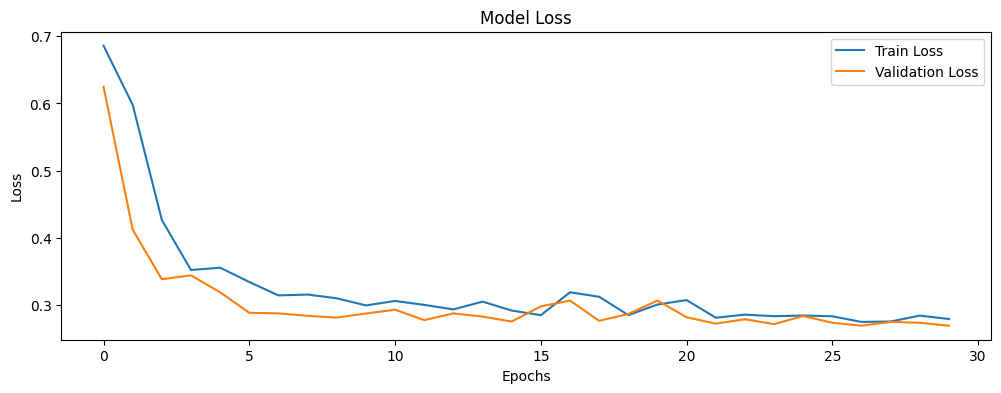

In [ ]:
import matplotlib.pyplot as plt
# Plot loss
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


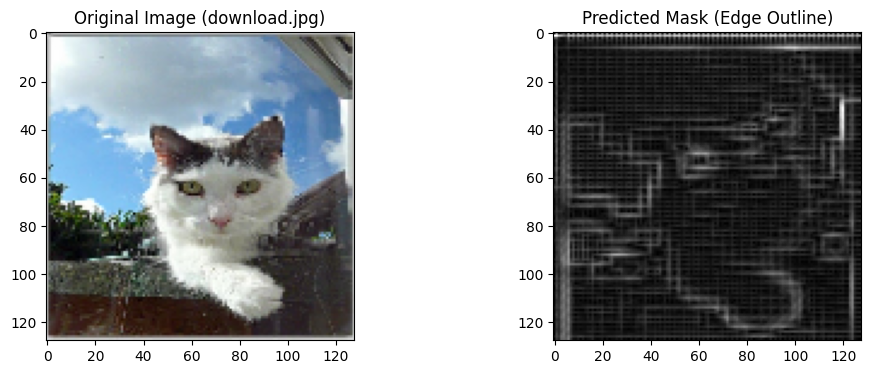

In [ ]:

# Function to perform edge detection (e.g., using Sobel filter or Canny edge detection)
def edge_detection(mask):
    # Convert the mask to uint8 (required for edge detection)
    mask = (mask * 255).astype(np.uint8)

    # Apply Sobel edge detection
    sobel_x = cv2.Sobel(mask, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(mask, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edge = np.hypot(sobel_x, sobel_y)  # Combine both Sobel axes

    # Normalize to 0-1 range
    sobel_edge = np.uint8(np.clip(sobel_edge, 0, 255))
    sobel_edge = sobel_edge / 255.0

    return sobel_edge

# Visualize a prediction with edge-detection outline
def visualize_prediction(model, img_path):
    # Load the specific image
    img = load_img(img_path, target_size=(128, 128))  # Resize if needed
    img = img_to_array(img) / 255.0  # Normalize the image

    # Make a prediction
    pred_mask = model.predict(np.expand_dims(img, axis=0))[0]

    # Apply edge detection on the predicted mask
    outlined_mask = edge_detection(pred_mask)


    # Plot original image and edge-detected predicted mask
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title('Original Image (download.jpg)')
    plt.imshow(img)

    plt.subplot(1, 2, 2)
    plt.title('Predicted Mask (Edge Outline)')
    plt.imshow(outlined_mask.squeeze(), cmap='gray')

    plt.show()

# Specify the path for the image
img_path = '/content/1.jpg'  # Path to the download.jpg image

# Visualize the prediction for the specific image with edge outline
visualize_prediction(model, img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


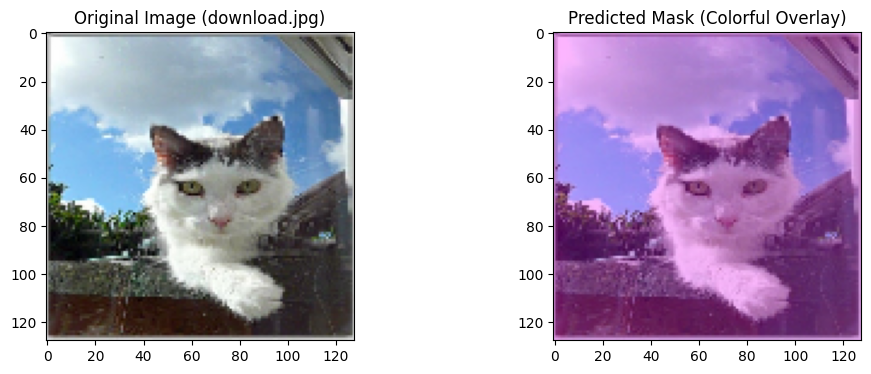

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to apply colorful overlay on the predicted mask
def colorful_overlay(mask, img):
    # Normalize the mask to the range [0, 1]
    mask = np.clip(mask, 0, 1)

    # Convert the mask to a 3-channel image with colors based on intensity
    mask_colored = cv2.applyColorMap((mask * 255).astype(np.uint8), cv2.COLORMAP_SPRING)

    # Blend the mask with the original image for a colorful overlay
    overlay = cv2.addWeighted(img, 0.7, mask_colored, 0.3, 0)

    return overlay

# Visualize a prediction with colorful overlay
def visualize_prediction(model, img_path):
    # Load the specific image
    img = load_img(img_path, target_size=(128, 128))  # Resize if needed
    img = img_to_array(img) / 255.0  # Normalize the image

    # Make a prediction
    pred_mask = model.predict(np.expand_dims(img, axis=0))[0]

    # Apply colorful overlay to the predicted mask
    overlay_mask = colorful_overlay(pred_mask, (img * 255).astype(np.uint8))

    # Plot original image and overlayed predicted mask
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title('Original Image (download.jpg)')
    plt.imshow(img)

    plt.subplot(1, 2, 2)
    plt.title('Predicted Mask (Colorful Overlay)')
    plt.imshow(overlay_mask)

    plt.show()

# Specify the path for the image
img_path = '/content/1.jpg'  # Path to the download.jpg image

# Visualize the prediction for the specific image with colorful overlay
visualize_prediction(model, img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


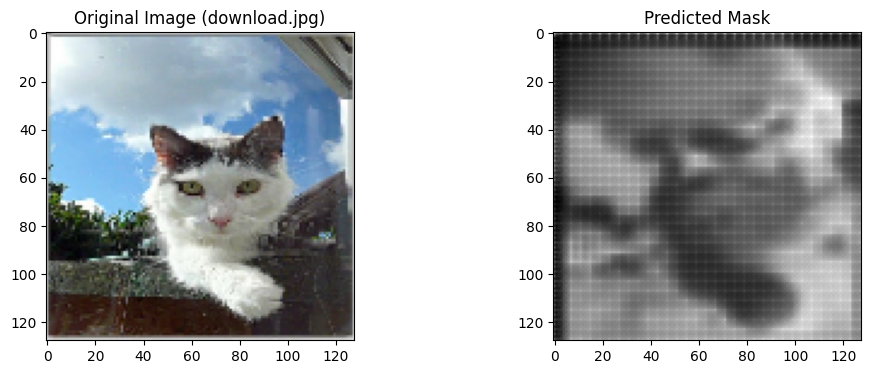

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Visualize a prediction for a specific image (without true mask)
def visualize_prediction(model, img_path):
    # Load the specific image
    img = load_img(img_path, target_size=(128, 128))  # Resize if needed
    img = img_to_array(img) / 255.0  # Normalize the image

    # Make a prediction
    pred_mask = model.predict(np.expand_dims(img, axis=0))[0]

    # Plot original image and predicted mask
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title('Original Image (download.jpg)')
    plt.imshow(img)

    plt.subplot(1, 2, 2)
    plt.title('Predicted Mask')
    plt.imshow(pred_mask.squeeze(), cmap='gray')

    plt.show()

# Specify the path for the image
img_path = '/content/1.jpg'  # Path to the download.jpg image

# Visualize the prediction for the specific image
visualize_prediction(model, img_path)


In [1]:
!pip install numpy tensorflow matplotlib scikit-learn opencv-python